### **Análise completa de uma base de dados de preços de aluguéis em São Paulo**

Iremos fazer uma análise completa de uma base de dados de preços de aluguéis em São Paulo. Usaremos Python e a biblioteca Pandas para importar, limpar, explorar e tirar conclusões dos dados.
Por fim ajustaremos um modelo de regressão linear para prever o preço do aluguel com base em variáveis selecionadas.

# Etapas do Projeto

1. Importação
2. Tratamento e Limpeza dos Dados
3. Análise Descritiva
4. Visualização de Dados
5. Modelagem de Regressão Linear
6. Conclusões





---



In [313]:
#importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [314]:
#importando os dados que foram carregados no github
df = pd.read_csv('https://raw.githubusercontent.com/fzta492/analise_alugueis_sao_paulo/main/base-alugueis-sp.csv')

In [315]:
#verificando se carregamento está ok com primeiras linhas
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


**2. Tratamento e Limpeza dos Dados**

In [316]:
#verificar informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [317]:
#criar uma coluna apenas com o preço do condominio/taxas. que é a diferença do aluguel para o total
df['condominio e taxas'] = df['total'] - df['rent']
df

,address,district,area,bedrooms,garage,type,rent,total,condominio e taxas
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,539
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,315
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,204
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,654
...,...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,1678
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480,6230
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,967
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200,1200


In [318]:
#verificar valores nulos
df.isnull().sum()
#sem valores nulos, asism não será necessário dar drop ou fillna

address               0
district              0
area                  0
bedrooms              0
garage                0
type                  0
rent                  0
total                 0
condominio e taxas    0
dtype: int64

In [319]:
#verificar duplicadas criando coluna auxiliar
df['concat'] = df.apply(lambda x: f"{x['address']}_{x['total']}_{x['rent']}_{x['district']}_{x['area']}", axis=1)
df['concat']

0                       Rua Herval_2939_2400_Belenzinho_21
1             Avenida São Miguel_1345_1030_Vila Marieta_15
2                  Rua Oscar Freire_4661_4000_Pinheiros_18
3                    Rua Júlio Sayago_1954_1750_Vila Ré_56
4               Rua Barata Ribeiro_4654_4000_Bela Vista_19
                               ...                        
11652     Avenida Adolfo Pinheiro_5778_4100_Santo Amaro_94
11653    Rua Professor Alexandre Correia_17480_11250_Ja...
11654       Rua Abílio Borin_5467_4500_Jardim Caravelas_84
11655    Rua Forte William_10200_9000_Jardim Fonte do M...
11656        Rua Alexandre Dumas_3440_3300_Santo Amaro_110
Name: concat, Length: 11657, dtype: object

In [320]:
#verificar duplicadas
duplicado = df.duplicated(subset=['concat'], keep=False)
df[duplicado]

,address,district,area,bedrooms,garage,type,rent,total,condominio e taxas,concat
71,Rua Natividade Saldanha,São Lucas,22,0,0,Studio e kitnet,900,1126,226,Rua Natividade Saldanha_1126_900_São Lucas_22
1067,Rua Dutra Rodrigues,Luz,26,1,0,Apartamento,1450,1656,206,Rua Dutra Rodrigues_1656_1450_Luz_26
1087,"Rua Quedas , 315",Vila Isolina Mazzei,60,2,0,Casa em condomínio,2600,2785,185,"Rua Quedas , 315_2785_2600_Vila Isolina Mazzei_60"
1100,"Rua Quedas , 315",Vila Isolina Mazzei,60,2,1,Casa em condomínio,2600,2785,185,"Rua Quedas , 315_2785_2600_Vila Isolina Mazzei_60"
1149,Rua José Manso,Vila Matilde,38,1,0,Apartamento,2600,2759,159,Rua José Manso_2759_2600_Vila Matilde_38
...,...,...,...,...,...,...,...,...,...,...
10446,Rua Campo Grande,Padroeira,65,2,0,Apartamento,1800,2483,683,Rua Campo Grande_2483_1800_Padroeira_65
10538,Rua Sabbado D’ângelo,Itaquera,40,2,0,Apartamento,4000,4354,354,Rua Sabbado D’ângelo_4354_4000_Itaquera_40
10548,Rua Sabbado D’ângelo,Itaquera,40,1,0,Apartamento,4000,4354,354,Rua Sabbado D’ângelo_4354_4000_Itaquera_40
11554,Avenida Cauaxi,Alphaville Industrial,38,1,1,Studio e kitnet,3800,3947,147,Avenida Cauaxi_3947_3800_Alphaville Industrial_38


In [321]:
#remover duplicadas
df = df.drop_duplicates(subset=['concat'], keep='first')
df

,address,district,area,bedrooms,garage,type,rent,total,condominio e taxas,concat
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,539,Rua Herval_2939_2400_Belenzinho_21
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,315,Avenida São Miguel_1345_1030_Vila Marieta_15
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,661,Rua Oscar Freire_4661_4000_Pinheiros_18
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,204,Rua Júlio Sayago_1954_1750_Vila Ré_56
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,654,Rua Barata Ribeiro_4654_4000_Bela Vista_19
...,...,...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,1678,Avenida Adolfo Pinheiro_5778_4100_Santo Amaro_94
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480,6230,Rua Professor Alexandre Correia_17480_11250_Ja...
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,967,Rua Abílio Borin_5467_4500_Jardim Caravelas_84
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200,1200,Rua Forte William_10200_9000_Jardim Fonte do M...


In [322]:
#removendo coluna auxiliar
df = df.drop('concat', axis = 1)
df

,address,district,area,bedrooms,garage,type,rent,total,condominio e taxas
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,539
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,315
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,204
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,654
...,...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,1678
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480,6230
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,967
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200,1200


In [323]:
#aplicar strip e lower a todos os elementos do DataFrame
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x).reset_index(drop=True)

In [324]:
#verificar descrição do df
df.describe()

,area,bedrooms,garage,rent,total,condominio e taxas
count,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000
mean,84.784995,1.968339,1.062376,3252.928160,4083.488084,830.559924
std,74.086168,0.931594,1.133104,2652.806687,3355.433357,939.757657
min,0.000000,0.000000,0.000000,500.000000,509.000000,9.000000
25%,40.000000,1.000000,0.000000,1590.000000,1998.000000,269.000000
50%,60.000000,2.000000,1.000000,2420.000000,3058.000000,577.000000
75%,96.000000,3.000000,2.000000,3800.000000,4779.500000,1019.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000,13700.000000


In [325]:
#apos o describe verificar possivel inconsistencia na coluna area aparecendo valor min de zero
df[df['area'] == 0]
#apenas 2 linhas encontradas. todos os outros valores aparentam estarem ok. realizar o drop apenas se for trabalhar a coluna 'area'

,address,district,area,bedrooms,garage,type,rent,total,condominio e taxas
2978,rua relíquia,jardim das laranjeiras,0,2,1,apartamento,1600,2569,969
7071,rua edmundo de amicis,morumbi,0,3,2,casa,3200,3351,151


In [326]:
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")

Limite Inferior: -2174.25
Limite Superior: 8951.75


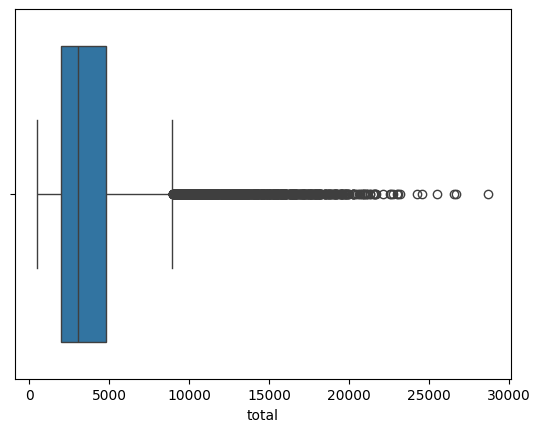

Limite Inferior: -2174.25
Limite Superior: 8951.75
IQR: 2781.5
total de outliers: 940

Índices dos Outliers: Index([  200,   319,   363,   388,   400,   682,   764,   802,   810,   822,
       ...
       11603, 11607, 11608, 11610, 11613, 11614, 11615, 11616, 11619, 11621],
      dtype='int64', length=940)


In [327]:
# análise de outliers
sns.boxplot(x=df['total'])
plt.show()
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")
print(f"IQR: {IQR}")
outliers = df[(df['total'] < limite_inferior) | (df['total'] > limite_superior)].index
contagem = outliers.value_counts().sum()
print(f'total de outliers: {contagem}')
print('')
print(f"Índices dos Outliers: {outliers}")
#df com drop outliers
df_removido = df.drop(outliers)

#df após a remoção dos outliers com condição lógica
df_removido_condicao = df[~((df['total'] < limite_inferior) | (df['total'] > limite_superior))]

#troca outliers pela media
df_substituido_media = df.copy()
media_total = df['total'].mean()
df_substituido_media.loc[outliers, 'total'] = media_total

#troca outliers pela mediana
df_substituido_mediana = df.copy()
mediana_total = df['total'].median()
df_substituido_mediana.loc[outliers, 'total'] = mediana_total



# 3. Análise Descritiva

In [328]:
#estatísticas descritivas
df.describe()

,area,bedrooms,garage,rent,total,condominio e taxas
count,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000
mean,84.784995,1.968339,1.062376,3252.928160,4083.488084,830.559924
std,74.086168,0.931594,1.133104,2652.806687,3355.433357,939.757657
min,0.000000,0.000000,0.000000,500.000000,509.000000,9.000000
25%,40.000000,1.000000,0.000000,1590.000000,1998.000000,269.000000
50%,60.000000,2.000000,1.000000,2420.000000,3058.000000,577.000000
75%,96.000000,3.000000,2.000000,3800.000000,4779.500000,1019.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000,13700.000000


In [329]:
#calculando as medidas de dispersão
desvio_padrao = df['rent'].std()
variancia = df['rent'].var()
range_ = df['rent'].max() - df['rent'].min()
q1 = df['rent'].quantile(0.25)
q3 = df['rent'].quantile(0.75)
iqr = q3 - q1

#exibindo os resultados
print(f'Desvio Padrão: {desvio_padrao:.2f}')
print(f'Variância: {variancia:.2f}')
print(f'Range: {range_:.2f}')
print(f'Primeiro Quartil (Q1): {q1:.2f}')
print(f'Terceiro Quartil (Q3): {q3:.2f}')
print(f'Intervalo Interquartil (IQR): {iqr:.2f}')

Desvio Padrão: 2652.81
Variância: 7037383.32
Range: 24500.00
Primeiro Quartil (Q1): 1590.00
Terceiro Quartil (Q3): 3800.00
Intervalo Interquartil (IQR): 2210.00


In [330]:
#detecção de anomalias usando média e desvio padrão
media = df['total'].mean()
desvio_padrao = df['total'].std()
limiar_superior = media + 3 * desvio_padrao
limiar_inferior = media - 3 * desvio_padrao
df['anomalia'] = df['total'].apply(lambda x: 'Sim' if (x > limiar_superior or x < limiar_inferior) else 'Não')

In [331]:
(df['anomalia'] == 'Sim').value_counts()

anomalia
False    11307
True       316
Name: count, dtype: int64

In [332]:
#realizando o teste de shapiro para a coluna RENT
stat, p_value = stats.shapiro(df['rent'])

#exibindo os resultados do teste
print(f'Estatística de Teste: {stat:.4f}')
print(f'Valor-p: {p_value:.4f}')

#interpretação dos resultados
alpha = 0.05
if p_value > alpha:
    print("os dados seguem uma distribuição normal (p > 0.05).")
else:
    print("os dados não seguem uma distribuição normal (p <= 0.05).")

Estatística de Teste: 0.7505
Valor-p: 0.0000
os dados não seguem uma distribuição normal (p <= 0.05).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [333]:
#analise de frequencia de imóveis
freq_imo = df['type'].value_counts()

In [334]:
#analise de frequencia de distritos
freq_distri = df['district'].value_counts()
maior = freq_distri.head(15)

In [335]:
#analise cruzada entre type e district
pd.crosstab(df['district'], df['type']).sort_values(by=['apartamento'], ascending=False)

type,apartamento,casa,casa em condomínio,studio e kitnet
district,,,,
bela vista,228,6,2,115
jardim paulista,192,5,0,23
vila mariana,149,31,1,50
pinheiros,124,8,1,26
cerqueira césar,122,1,2,15
...,...,...,...,...
vila fátima,0,1,1,0
vila friburgo,0,3,0,0
lapa de baixo,0,4,0,1


In [336]:
#analise de agrupamento por categoria
agrupado_df = df.groupby(df['type']).agg({'rent': ['mean', 'median', 'std']}).reset_index()
# Renomeando as colunas para facilitar a leitura
agrupado_df.columns = ['Tipo de Imóvel', 'Média do Aluguel', 'Mediana do Aluguel', 'Desvio Padrão do Aluguel']

In [337]:
#regra de Sturges
k = 1 + (10 /3) * np.log10(df.shape[0])
k = int(k.round(0))
k

15

In [338]:
#criar a tabela de frequências
frequencia = pd.value_counts(
  pd.cut(
    x = df['total'],
    bins = k,
    include_lowest = True
  ),
  sort = False
)
percentual = pd.value_counts(
  pd.cut(
    x = df['total'],
    bins = k,
    include_lowest = True
  ),
  sort = False,
  normalize = True
)

In [339]:
#criando df de frequencia
freq_quantitativas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
freq_quantitativas.reset_index()

,total,Frequência,Porcentagem (%)
0,"(480.80800000000005, 2388.4]",4040,0.347587
1,"(2388.4, 4267.8]",4041,0.347673
2,"(4267.8, 6147.2]",1679,0.144455
3,"(6147.2, 8026.6]",701,0.060311
4,"(8026.6, 9906.0]",375,0.032264
5,"(9906.0, 11785.4]",257,0.022111
6,"(11785.4, 13664.8]",186,0.016003
7,"(13664.8, 15544.2]",119,0.010238
8,"(15544.2, 17423.6]",96,0.008259
9,"(17423.6, 19303.0]",70,0.006023


# 4. Visualização dos dados

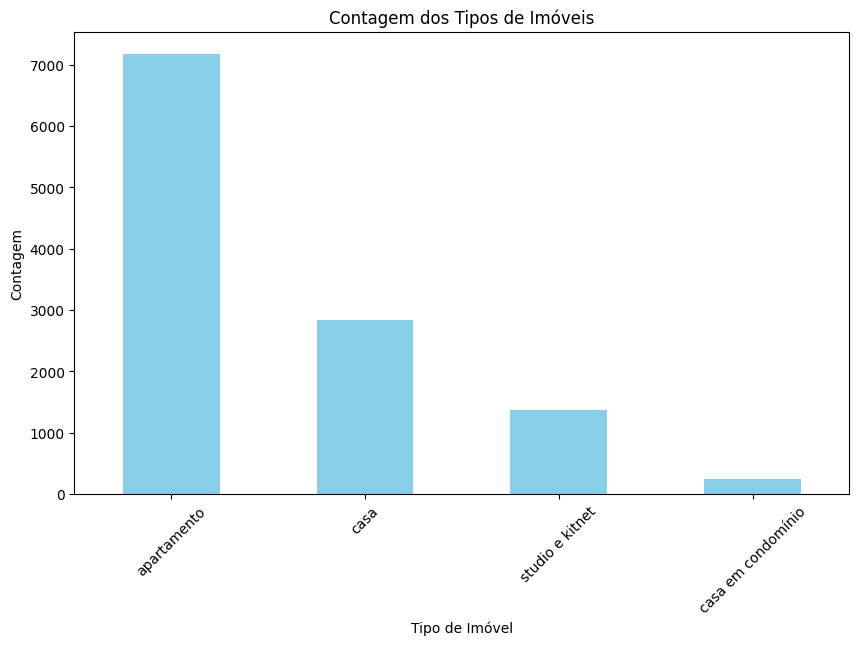

In [340]:
# plotando o gráfico de barras de contagem dos tipos de imoveis
plt.figure(figsize=(10, 6))
freq_imo.plot(kind='bar', color='skyblue')
plt.title('Contagem dos Tipos de Imóveis')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

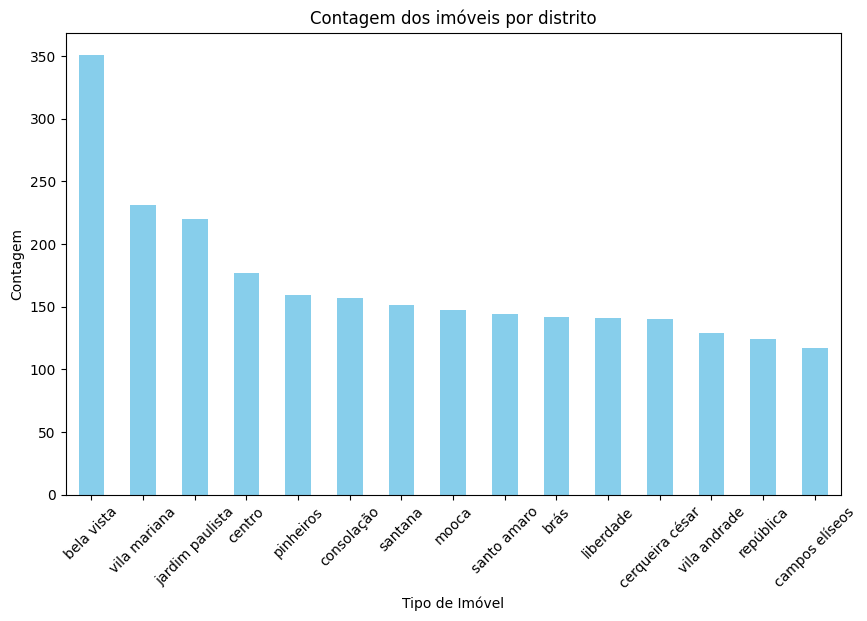

In [341]:
# Plotando o gráfico de barras dos 15 distritos com mais imoveis(seguindo regra de Sturges)
plt.figure(figsize=(10, 6))
maior.plot(kind='bar', color='skyblue')
plt.title('Contagem dos imóveis por distrito')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

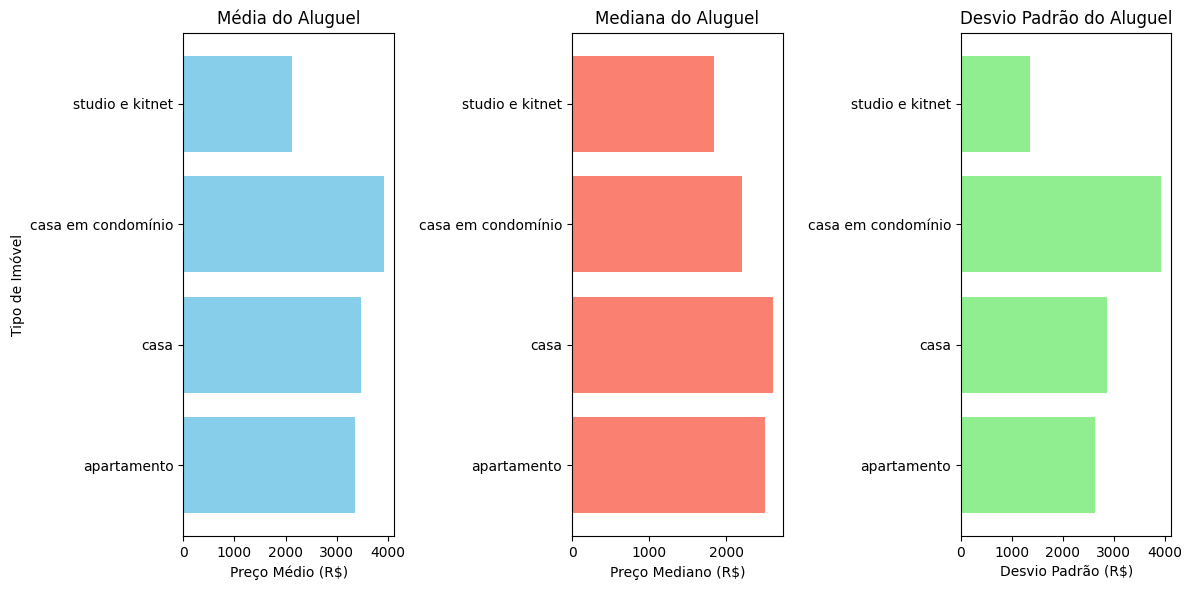

In [342]:
# Plotando os resultados
plt.figure(figsize=(12, 6))

# Média do Aluguel
plt.subplot(1, 3, 1)
plt.barh(agrupado_df['Tipo de Imóvel'], agrupado_df['Média do Aluguel'], color='skyblue')
plt.title('Média do Aluguel')
plt.xlabel('Preço Médio (R$)')
plt.ylabel('Tipo de Imóvel')

# Mediana do Aluguel
plt.subplot(1, 3, 2)
plt.barh(agrupado_df['Tipo de Imóvel'], agrupado_df['Mediana do Aluguel'], color='salmon')
plt.title('Mediana do Aluguel')
plt.xlabel('Preço Mediano (R$)')

# Desvio Padrão do Aluguel
plt.subplot(1, 3, 3)
plt.barh(agrupado_df['Tipo de Imóvel'], agrupado_df['Desvio Padrão do Aluguel'], color='lightgreen')
plt.title('Desvio Padrão do Aluguel')
plt.xlabel('Desvio Padrão (R$)')

plt.tight_layout()
plt.show()


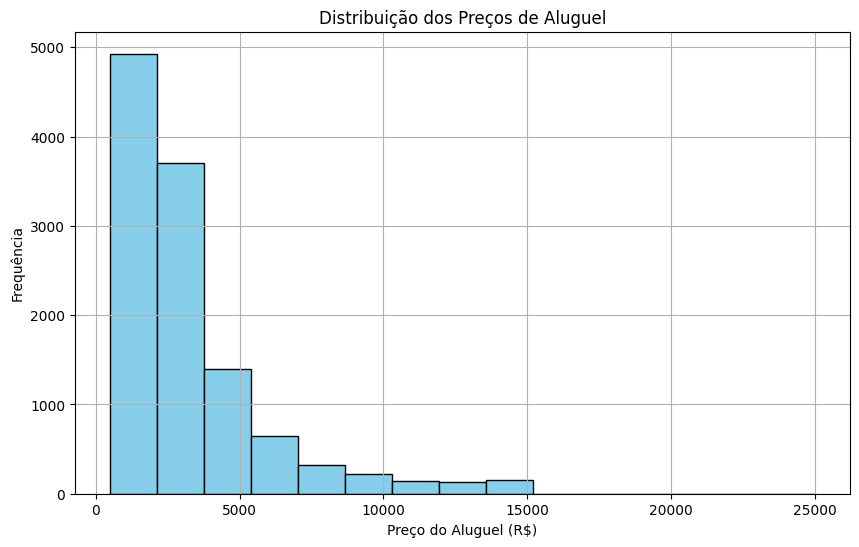

In [343]:
#histograma do aluguel
plt.figure(figsize=(10, 6))
plt.hist(df['rent'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Preços de Aluguel')
plt.xlabel('Preço do Aluguel (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

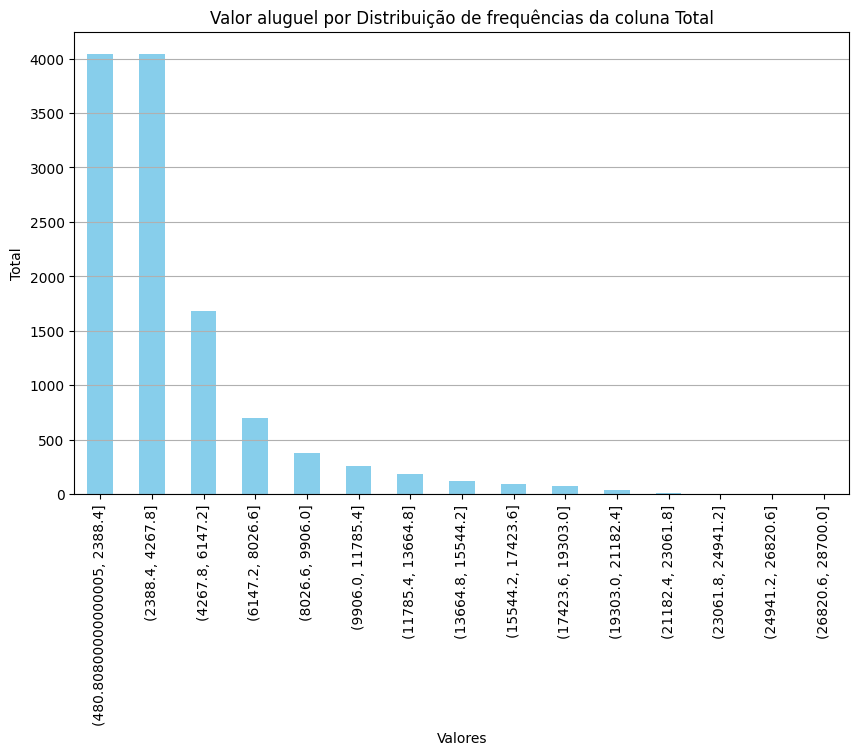

In [344]:
#grafico de barras por distribuição de frequencia
plt.figure(figsize=(10, 6))
freq_quantitativas['Frequência'].plot(kind='bar', color='skyblue')
plt.title('Valor aluguel por Distribuição de frequências da coluna Total')
plt.xlabel('Valores')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Medida separatriz

<ipython-input-345-277a165ef0cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='rent', data=df, palette='pastel')


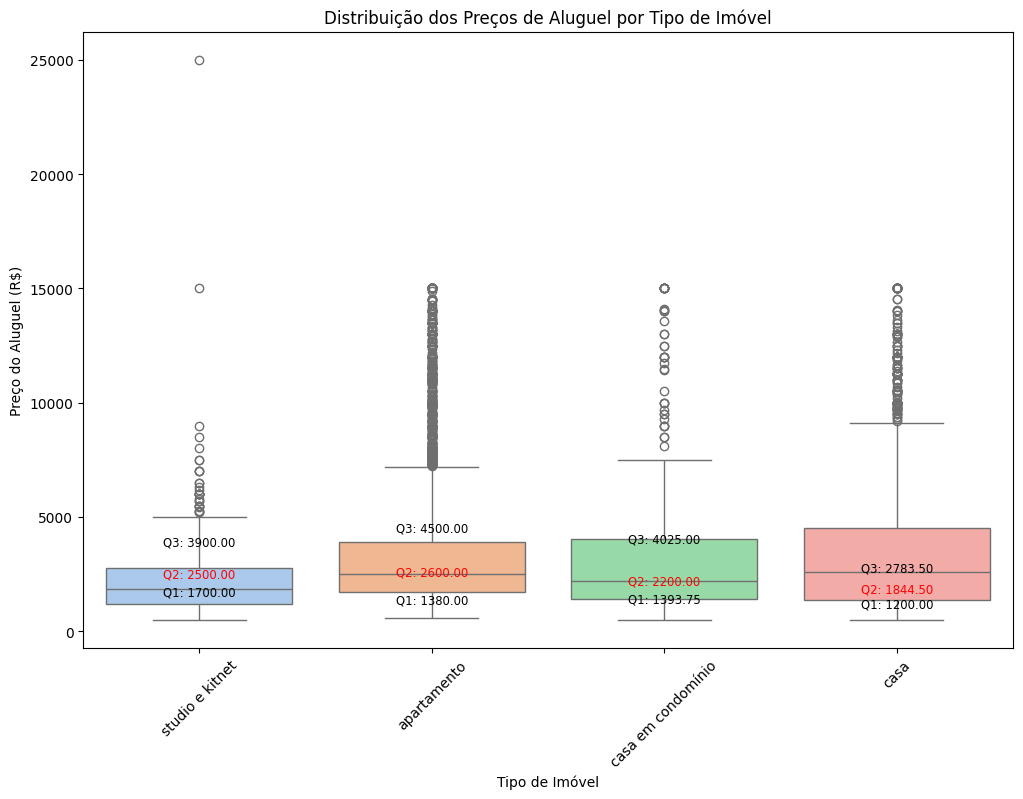

In [345]:
#boxplot
# Criando o boxplot para a coluna rent
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='rent', data=df, palette='pastel')
grupo = df.groupby('type')['rent']
for i, type_ in enumerate(grupo):
    q1 = type_[1].quantile(0.25)
    q2 = type_[1].median()
    q3 = type_[1].quantile(0.75)
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', size='small', color='black', verticalalignment='center')
    plt.text(i, q2, f'Q2: {q2:.2f}', horizontalalignment='center', size='small', color='red', verticalalignment='center')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', size='small', color='black', verticalalignment='center')
plt.title('Distribuição dos Preços de Aluguel por Tipo de Imóvel')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Preço do Aluguel (R$)')
plt.xticks(rotation=45)
plt.show()

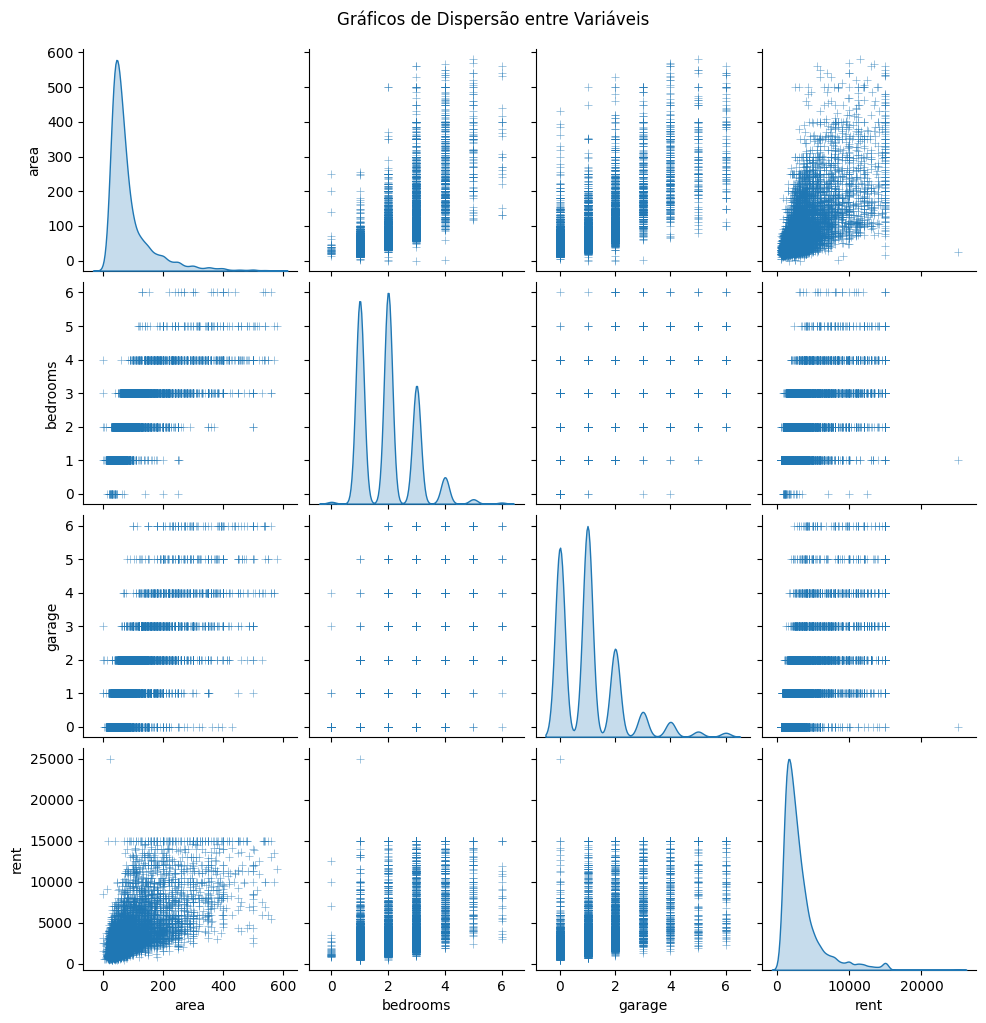

In [346]:
# Selecionando as variáveis para análise
scc = ['area', 'bedrooms', 'garage', 'rent']

# Criando scatter plots para cada par de variáveis
sns.pairplot(df[scc], diag_kind='kde', markers='+', plot_kws={'alpha': 0.6})
plt.suptitle('Gráficos de Dispersão entre Variáveis', y=1.02)
plt.show()

# Estatística

              area  bedrooms    garage      rent
area      1.000000  0.727708  0.733292  0.667419
bedrooms  0.727708  1.000000  0.656659  0.531140
garage    0.733292  0.656659  1.000000  0.617269
rent      0.667419  0.531140  0.617269  1.000000


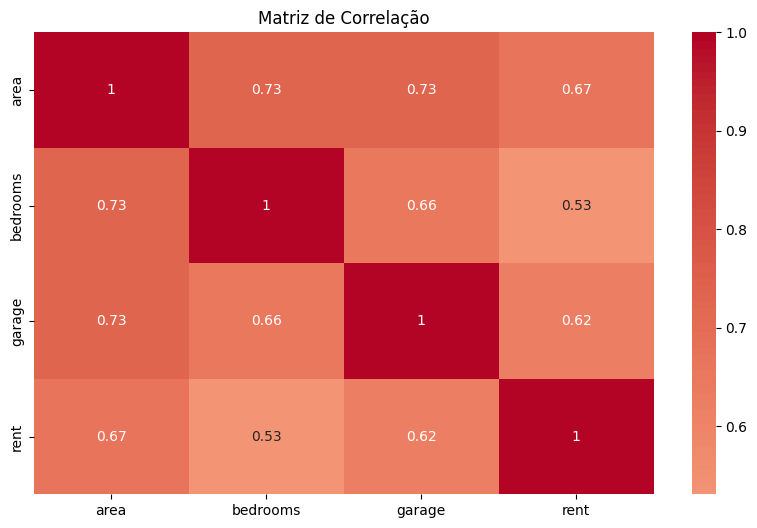

In [347]:
# Análise de correlação
# Selecionando as variáveis para a análise de correlação
colunas = ['area', 'bedrooms', 'garage', 'rent']

# Calculando a matriz de correlação
correlacao = df[colunas].corr()

# Exibindo a matriz de correlação
print(correlacao)

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

Cluster k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


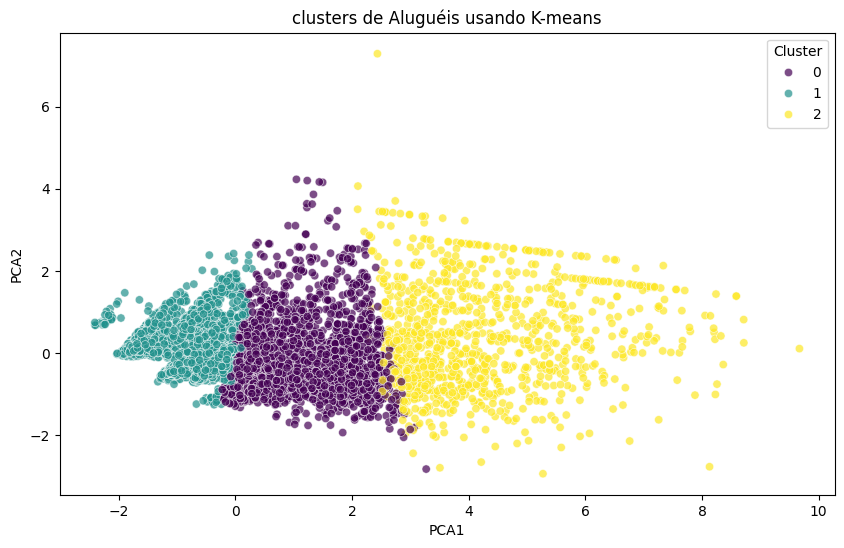

cluster
1    7324
0    3281
2    1018
Name: count, dtype: int64


In [348]:
# Selecionando as variáveis para a análise de cluster
varia = ['area', 'bedrooms', 'garage', 'rent']
df_analise = df[varia]

#escalando os dados
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_analise)

#aplicando o algoritmo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaler)

#adicionando os clusters ao df original
df['cluster'] = clusters

#reduzindo a dimensionalidade para 2D usando PCA para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaler)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = clusters

#visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis', alpha=0.7)
plt.title('clusters de Aluguéis usando K-means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

#exibindo a quantidade de pontos em cada cluster
print(df['cluster'].value_counts())

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11623 entries, 0 to 11622
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   address             11623 non-null  object
 1   district            11623 non-null  object
 2   area                11623 non-null  int64 
 3   bedrooms            11623 non-null  int64 
 4   garage              11623 non-null  int64 
 5   type                11623 non-null  object
 6   rent                11623 non-null  int64 
 7   total               11623 non-null  int64 
 8   condominio e taxas  11623 non-null  int64 
 9   anomalia            11623 non-null  object
 10  cluster             11623 non-null  int32 
dtypes: int32(1), int64(6), object(4)
memory usage: 953.6+ KB


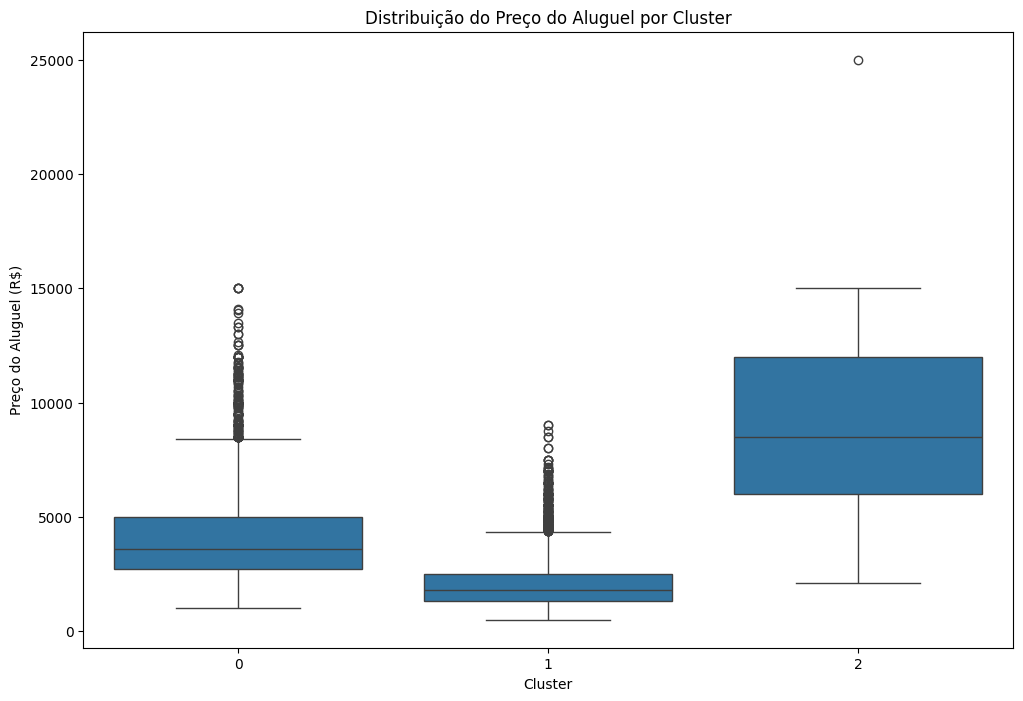

In [350]:
#estatísticas descritivas para cada cluster
vis_clus = df.groupby(df['cluster']).agg({'rent': ['mean']})

#visualização das estatísticas descritivas
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='rent', data=df)
plt.title('Distribuição do Preço do Aluguel por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Preço do Aluguel (R$)')
plt.show()

In [351]:
#análise de preferência por tipo de imóvel dentro dos clusters
cluster_type_preference = df.groupby(['cluster', 'type']).size().unstack().fillna(0)
print(cluster_type_preference)

type     apartamento  casa  casa em condomínio  studio e kitnet
cluster                                                        
0               2151  1044                  79                7
1               4614  1230                 118             1362
2                409   565                  43                1


## 5. Modelagem de Regressão Linear

In [352]:
#transformar as variáveis pode ajudar a tornar os dados mais próximos de uma distribuição normal

# Aplicando transformação logarítmica
df['rent_log'] = np.log(df['rent'] + 1)  # Adiciona 1 para evitar log(0)
df['total_log'] = np.log(df['total'] + 1)

In [353]:
# Selecionando variáveis para a regressão linear
features = ['total_log','area', 'bedrooms', 'garage', 'cluster']
target = 'rent_log'

# Dividindo os dados em conjuntos de treino e teste
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionando a constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Ajustando o modelo de regressão linear
model = sm.OLS(y_train, X_train_const).fit()

# Fazendo previsões no conjunto de teste
y_pred_log = model.predict(X_test_const)

# Desfazendo a transformação logarítmica para obter os valores reais
y_pred = np.exp(y_pred_log) - 1

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

# Resumo do modelo
model_summary = model.summary()
print(model_summary)


MSE: 17505733.610369176
R^2: -39966757.864051506
                            OLS Regression Results                            
Dep. Variable:               rent_log   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 4.664e+04
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        01:22:38   Log-Likelihood:                 5826.9
No. Observations:                9298   AIC:                        -1.164e+04
Df Residuals:                    9292   BIC:                        -1.160e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [354]:
#adicionando a constante ao DataFrame completo
X_const = sm.add_constant(X)

#adicionando as previsões ao DataFrame original
df['previsao rent'] = np.round(np.exp(model.predict(X_const)) - 1)

In [355]:
df

,address,district,area,bedrooms,garage,type,rent,total,condominio e taxas,anomalia,cluster,rent_log,total_log,previsao rent
0,rua herval,belenzinho,21,1,0,studio e kitnet,2400,2939,539,Não,1,7.783641,7.986165,2304.0
1,avenida são miguel,vila marieta,15,1,1,studio e kitnet,1030,1345,315,Não,1,6.938284,7.204893,1095.0
2,rua oscar freire,pinheiros,18,1,0,apartamento,4000,4661,661,Não,1,8.294300,8.447200,3530.0
3,rua júlio sayago,vila ré,56,2,2,casa em condomínio,1750,1954,204,Não,0,7.467942,7.578145,1582.0
4,rua barata ribeiro,bela vista,19,1,0,studio e kitnet,4000,4654,654,Não,1,8.294300,8.445697,3528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11618,avenida adolfo pinheiro,santo amaro,94,2,1,apartamento,4100,5778,1678,Não,0,8.318986,8.661986,4518.0
11619,rua professor alexandre correia,jardim vitória régia,350,4,4,apartamento,11250,17480,6230,Sim,2,9.328212,9.768870,14176.0
11620,rua abílio borin,jardim caravelas,84,1,2,apartamento,4500,5467,967,Não,1,8.412055,8.606668,4196.0
11621,rua forte william,jardim fonte do morumbi,76,1,0,apartamento,9000,10200,1200,Não,1,9.105091,9.230241,7638.0


In [356]:
#calculando o VIF para verificar multicolinearidade
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print(vif_data)

     feature         VIF
0      const  246.460553
1  total_log    1.884214
2       area    3.449719
3   bedrooms    2.670554
4     garage    2.590232
5    cluster    1.242690


# Verificação dos Resíduos

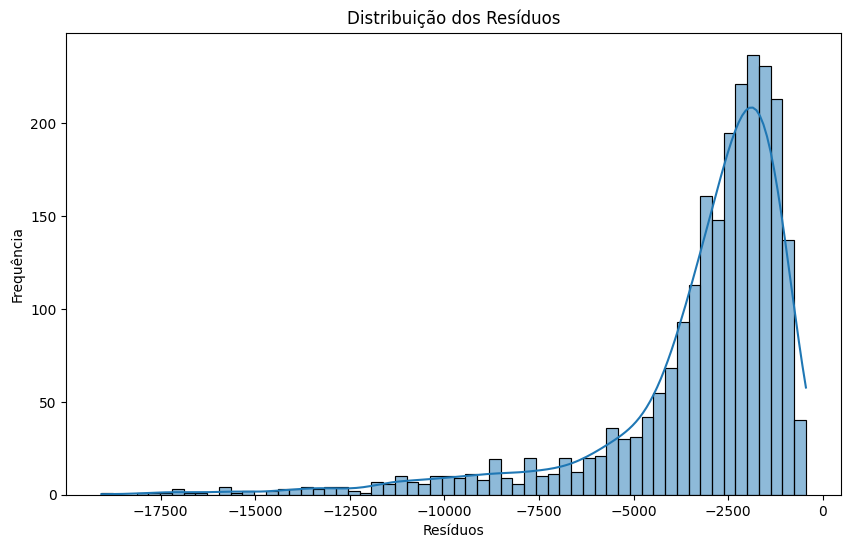

In [357]:
#analisando os resíduos
residuo = y_test - y_pred

#plotando os resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuo, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()



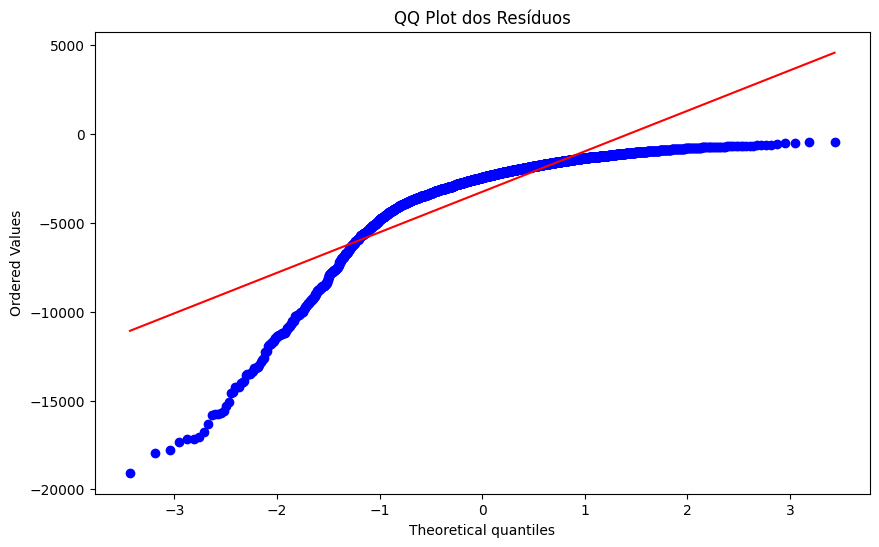

In [358]:
#QQ plot dos resíduos
plt.figure(figsize=(10, 6))
probplot(residuo, dist="norm", plot=plt)
plt.title('QQ Plot dos Resíduos')
plt.show()



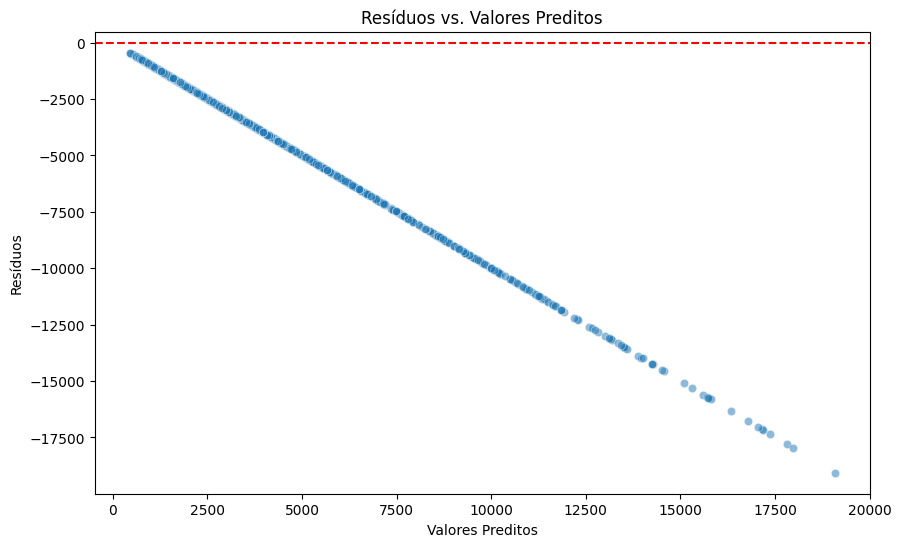

In [359]:
#plot de resíduos vs. valores preditos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuo, alpha=0.5)
plt.title('Resíduos vs. Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [360]:
#teste de Shapiro-Wilk para os resíduos
stat_res, p_value_res = stats.shapiro(residuo)
print(f'Estatística de Teste dos Resíduos: {stat_res:.4f}')
print(f'Valor-p dos Resíduos: {p_value_res:.4f}')

#se o valor-p for menor ou igual a 0.05, os resíduos não seguem uma distribuição normal
if p_value_res <= 0.05:
    print("Os resíduos não seguem uma distribuição normal (p <= 0.05).")
else:
    print("Os resíduos seguem uma distribuição normal (p > 0.05).")

Estatística de Teste dos Resíduos: 0.7443
Valor-p dos Resíduos: 0.0000
Os resíduos não seguem uma distribuição normal (p <= 0.05).


In [361]:
#sumario da regressão
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:               rent_log   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 4.664e+04
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        01:22:39   Log-Likelihood:                 5826.9
No. Observations:                9298   AIC:                        -1.164e+04
Df Residuals:                    9292   BIC:                        -1.160e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3239      0.021     15.382      0.0

# Fazendo previsão com o df sem outliers

In [363]:
df_removido = pd.DataFrame(df_removido)
#selecionando variáveis para a regressão linear
features = ['total','area', 'bedrooms', 'garage']
target = 'rent'

#dividindo os dados em conjuntos de treino e teste
X = df_removido[features]
y = df_removido[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#adicionando uma constante para o modelo de regressão
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#ajustando o modelo de regressão linear
model = sm.OLS(y_train, X_train_sm).fit()

#fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_sm)

#avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

#resumo do modelo
model_summary = model.summary()
print(model_summary)


MSE: 134997.62298708025
R^2: 0.935853547980126
                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 3.030e+04
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        01:24:05   Log-Likelihood:                -62728.
No. Observations:                8546   AIC:                         1.255e+05
Df Residuals:                    8541   BIC:                         1.255e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

O modelo logarítmico (Modelo 1) tem um ajuste ligeiramente melhor que o modelo com preços de aluguel originais (Modelo 2), conforme indicado pelos valores mais altos de R² e R² ajustado.  
O erro médio quadrático (MSE) é significativamente menor no modelo logarítmico, indicando previsões mais precisas nessa escala.  
Ambos os modelos têm resíduos que não seguem uma distribuição normal, conforme indicado pelos testes Omnibus e Jarque-Bera.  
   
O o Modelo Logarítmico é mais recomendado. A transformação logarítmica ajuda a mitigar o impacto de outliers e a lidar com a heterocedasticidade.

## 6. Próximos Passos
Explorar a Relação Inversa    
Os coeficientes negativos para bedrooms e garage podem indicar relações inversas inesperadas. Vale a pena investigar mais detalhadamente por que esses coeficientes são negativos.  
Verificar Outliers  
Considerar a análise de outliers que podem estar influenciando a significância dos coeficientes.  
Testes de Suposições  
Continuar testando as suposições do modelo, como a homocedasticidade e a normalidade dos resíduos.